# 🧠 Support Vector Machines (SVM) - Kernel Exploration with Moon Dataset

## 📌 Objective

In this notebook, we will explore how **Support Vector Machines (SVM)** can be applied to a **non-linearly separable dataset** using different **kernel functions**.

The goal is to:
- Understand how different **kernels** influence the decision boundary of an SVM.
- Train and evaluate SVM models with `linear`, `polynomial`, `RBF`, and `sigmoid` kernels.
- Visualize how each kernel behaves on a synthetic dataset with clear non-linear patterns.

---

## 🗂️ Dataset

We will use the **`make_moons`** dataset, a synthetic dataset commonly used to demonstrate non-linear classification problems. It consists of two interleaved semicircles (moons) and is ideal for testing the effect of kernels in SVMs.

---

## 🧩 What You'll Learn

- How to preprocess and scale data for SVMs
- How the **kernel trick** enables SVM to work in non-linear spaces
- The impact of each kernel on classification performance and decision boundaries
- How to interpret SVM outputs and choose kernels in practice

---

## 📦 Libraries Used

- `scikit-learn` for dataset generation and modeling
- `matplotlib` and `seaborn` for visualization
- `numpy` and `pandas` for data handling

---

## 🚀 Let's begin!


In [1]:
# 📘 Support Vector Machines: Moon Dataset (Non-linear Classification)

## 📌 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


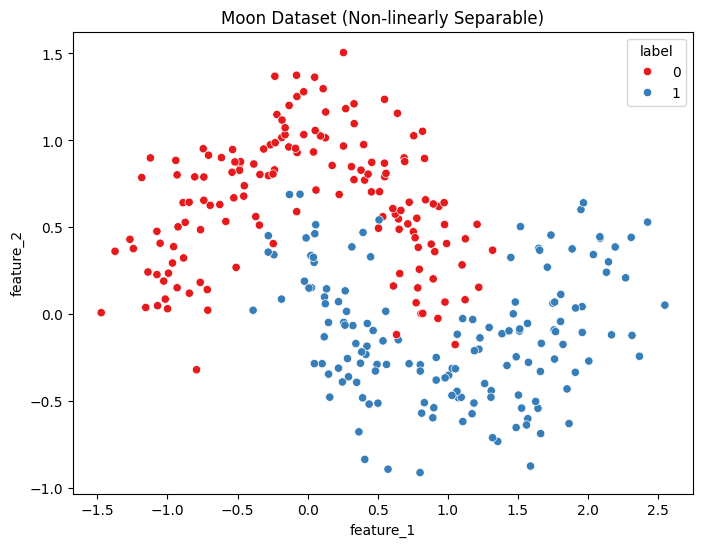

In [2]:
## 📊 Step 2: Generate and Visualize the Dataset
# Create the dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
df["label"] = y

# Visualize the distribution
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="feature_1", y="feature_2", hue="label", palette="Set1")
plt.title("Moon Dataset (Non-linearly Separable)")
plt.show()


In [3]:
## 🔧 Step 3: Preprocessing
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
## 🤖 Step 4: Train SVM Models with Different Kernels

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    clf = SVC(kernel=kernel, C=1.0)
    clf.fit(X_train_scaled, y_train)
    models[kernel] = clf


In [5]:
## 📈 Step 5: Evaluate Models

for kernel, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 Kernel: {kernel.upper()}")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


🔹 Kernel: LINEAR
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        34

    accuracy                           0.90        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.91      0.90      0.90        60

--------------------------------------------------
🔹 Kernel: POLY
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.91        34

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60

--------------------------------------------------
🔹 Kernel: RBF
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.92      0.97      0.94 

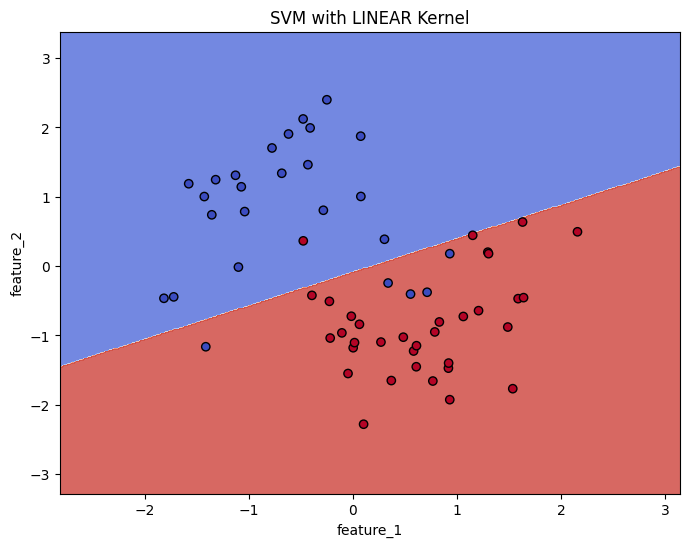

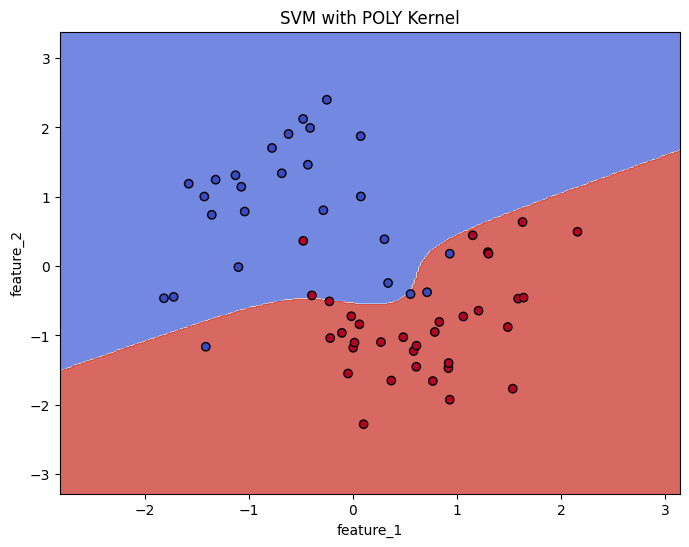

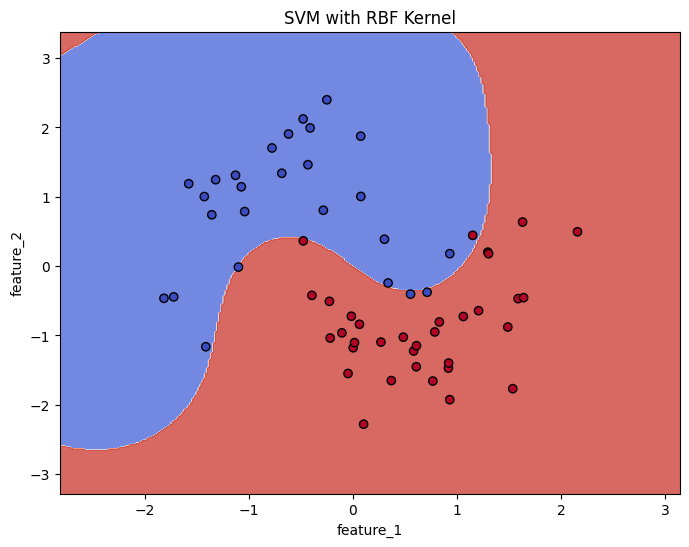

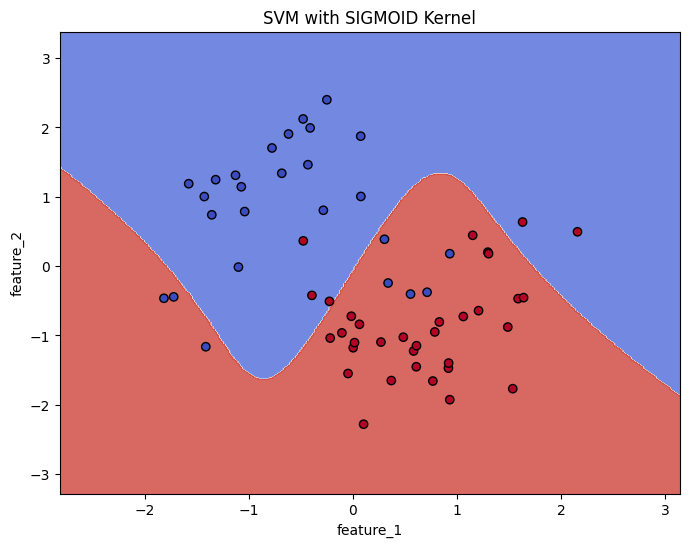

In [6]:
## 🧭 Step 6: Visualize Decision Boundaries

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("feature_1")
    plt.ylabel("feature_2")
    plt.show()

# Plot for each kernel
for kernel, model in models.items():
    plot_decision_boundary(model, X_test_scaled, y_test, f"SVM with {kernel.upper()} Kernel")
